In [2]:
%load_ext autoreload
%autoreload 2

In [28]:
import json
import os
import pandas as pd
from datetime import datetime
from datetime import timedelta
from dotenv import load_dotenv, find_dotenv
from shapely.geometry import Point, Polygon, MultiPolygon
import geopandas as gpd
from pathlib import Path
#from src.hydra import mongo_utils
from src.hydra import gather_tweets
from src.func import geo_utils
from src.func import tweet_utils
from src.func import regex
%matplotlib inline

In [10]:
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()
# load up the entries as environment variables
load_dotenv(dotenv_path)
# connect to geotweet mongodb
#geotweets = mongo_utils.geotweet_connect(os.environ.get("MONGO_USER"),os.environ.get("MONGO_PASSWORD"))
geotweets = gather_tweets.Tweetdb('tweets', 'geotweets').documents
#geotweets.find_one()

In [ ]:
city = "../data/processed/city_geo/NY_New_York_3651000.geojson"
s_type, s_coordinates = gather_tweets.get_polygon(city)
dates = pd.date_range(start=datetime(2014,5,1),end=datetime(2014,5,2))

In [ ]:
cursor = mongo_utils.tweet_aggregator(geotweets, s_coordinates, datetime(2014,5,1), s_type)

tweets = []
for tweet in cursor:
    tweets.append(tweet)
len(tweets)

In [7]:
florida = geo_utils.merge_tweets(Path("../data/raw/tweets/FL_Port_St_Lucie/"))

In [8]:
len(florida)

300

In [4]:
city = "../data/processed/city_geo/TX_Houston_4835000.geojson"
s_type, s_coordinates = gather_tweets.get_polygon(city)
dates = pd.date_range(start=datetime(2014,5,1),end=datetime(2014,5,2))

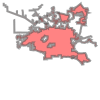

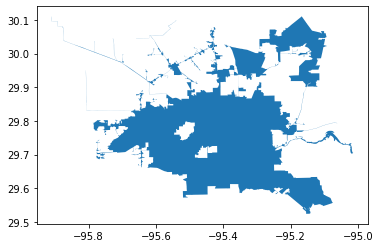

In [34]:
gdf = gpd.read_file(city)
gdf.plot()
gdf.iloc[0].geometry

In [75]:
gdf2 = gpd.overlay(gdf, gdf, how='union')
gdf2.to_file(driver='GeoJSON', filename= "houston_test.geojson")
s_type, s_coordinates = gather_tweets.get_polygon("houston_test.geojson")

In [59]:
from shapely.ops import cascaded_union
boundary = gpd.GeoSeries(cascaded_union(gdf.iloc[0].geometry))
boundary.simplify(tolerance=.1)

0    (POLYGON ((-95.2444759398833 29.582459059965, ...
dtype: object

In [77]:
i = 0
for s in s_coordinates:
    try: 
        print("in {}".format(i))
        print(s[0][55])
        print(s[0][60])
    except:
        pass
    i+=1

in 0
[-95.2951420448017, 30.0052421242713]
[-95.2951159375138, 30.0059680207903]
in 1
in 2
in 3
[-95.5376899787492, 29.9687000136898]
[-95.5361580704663, 29.9690181061543]
in 4
[-95.5741001008322, 29.9910321046432]
[-95.5782730560505, 29.9954249827582]
